In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

In [2]:
hop_length = 512
sample_rate = 44100
treshold_db = 25

# Load audio file
y, sr = librosa.load('files/wav/test-sample-4.wav', sr=sample_rate)

# Trim the beginning and ending silence
y, _ = librosa.effects.trim(y, top_db=treshold_db, hop_length=hop_length)

# Normalize audio
y = librosa.util.normalize(y)

print(y.shape, sr)

(87688,) 44100


In [3]:
ipd.Audio(y, rate=sr)

In [4]:
hop_length = 512

# Get the frame->beat strength profile
onset_envelope = librosa.onset.onset_strength(y=y,
                                              sr=sr,
                                              hop_length=hop_length,
                                              aggregate=np.median)

# Locate note onset events
onsets = librosa.onset.onset_detect(y=y,
                                    sr=sr,
                                    onset_envelope=onset_envelope,
                                    hop_length=hop_length,
                                    backtrack=True)

# Convert frames to time
times = librosa.frames_to_time(np.arange(len(onset_envelope)),
                               sr=sr,
                               hop_length=hop_length)

print('Peaks', onsets)
print('Times', times[onsets])

Peaks [  2  11  22  34  47  61  78  94  97 110 122 134 146 150 168]
Times [0.02321995 0.12770975 0.2554195  0.39473923 0.54566893 0.70820862
 0.90557823 1.09133787 1.1261678  1.27709751 1.41641723 1.55573696
 1.69505669 1.7414966  1.95047619]


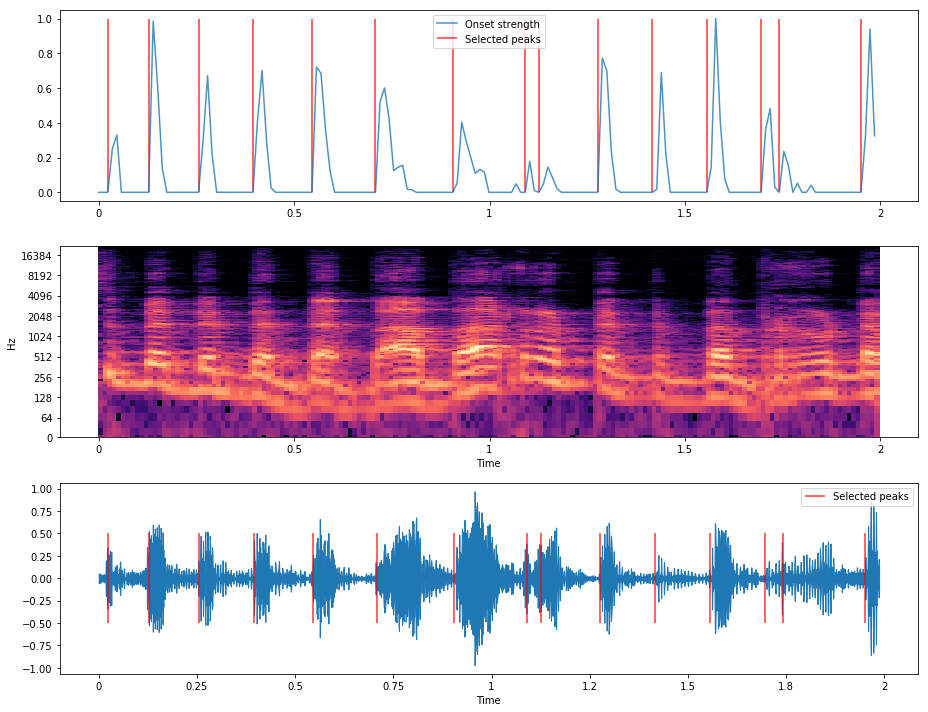

In [5]:
plt.figure(figsize=(13, 10))

# Draw spectrogram
ax = plt.subplot(3, 1, 2)
D = librosa.stft(y)
librosa.display.specshow(
    librosa.amplitude_to_db(librosa.magphase(D)[0], ref=np.max),
    sr=sr,
    hop_length=hop_length,
    y_axis='log',
    x_axis='time')

# Draw onsets & strenghts
plt.subplot(3, 1, 1, sharex=ax)
plt.plot(times, onset_envelope, alpha=0.8, label='Onset strength')
plt.vlines(times[onsets], 0, onset_envelope.max(),
           color='r', alpha=0.8, label='Selected peaks')
plt.legend(frameon=True, framealpha=0.8)

# Draw waveform with onset markings
plt.subplot(3, 1, 3)
plt.vlines(times[onsets], -0.5, 0.5, color='r',
           alpha=0.8, label='Selected peaks')
plt.legend(frameon=True, framealpha=0.8)
librosa.display.waveplot(y, sr=sr)

plt.axis('tight')
plt.tight_layout()

In [6]:
clicks = librosa.clicks(frames=onsets, sr=sr, length=len(y))
ipd.Audio(y + clicks, rate=sr)